In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from PIL import Image
import os
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.ndimage import uniform_filter





In [2]:
def calculate_grid_entropy(image, grid_size=(32, 32)):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy




In [59]:
def process_image_sequence(tiff_folder_path):
    tiff_files = [f for f in os.listdir(tiff_folder_path) if f.endswith('_Cy5_000.tif')]
    entropy_over_time = []

    for tiff_file in tiff_files:
        image_path = os.path.join(tiff_folder_path, tiff_file)
        image = Image.open(image_path)
        image_np = np.array(image)


        # Apply a uniform filter to the image
        size = 8  # The size of the filtering window
        image_np = uniform_filter(image_np, size=size)
        
        entropy = calculate_grid_entropy(image_np)
        entropy_over_time.append(entropy)
    
    return entropy_over_time

# Assuming base_path is the directory containing your 'posX' folders
base_folder = '/Volumes/SL_2023/0104'
experiment_folders = [f for f in os.listdir(base_folder) if 'correlation' in f]

video_data = []

for exp_folder in experiment_folders:
    # Extract incubation time from the experiment folder name
    incubation_time_str = exp_folder.split('_')[1]  # '10_min'
    incubation_time = int(incubation_time_str.split('_')[0])  # 10
    exp_folder_path = os.path.join(base_folder, exp_folder)
    pos_folders = [os.path.join(exp_folder_path, d) for d in os.listdir(exp_folder_path) if d.startswith('Pos')]

    for pos_folder in pos_folders:
        print(f"Processing folder: {pos_folder}")  # Print the current folder being processed
        entropy_over_time = process_image_sequence(pos_folder)
        
        for i, entropy in enumerate(entropy_over_time):
            video_data.append({
                'Frame Number': i,
                'Entropy': entropy,
                'Incubation Time': incubation_time
            })

# Create DataFrame
df = pd.DataFrame(video_data)



Processing folder: /Volumes/SL_2023/0104/correlation_10_min_no_6.1_1/Pos0
Processing folder: /Volumes/SL_2023/0104/correlation_10_min_no_6.1_1/Pos1
Processing folder: /Volumes/SL_2023/0104/correlation_10_min_no_6.1_1/Pos2
Processing folder: /Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos0
Processing folder: /Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos1
Processing folder: /Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos2
Processing folder: /Volumes/SL_2023/0104/correlation_145_min_no_6.1_1/Pos0
Processing folder: /Volumes/SL_2023/0104/correlation_145_min_no_6.1_1/Pos1
Processing folder: /Volumes/SL_2023/0104/correlation_145_min_no_6.1_1/Pos2
Processing folder: /Volumes/SL_2023/0104/correlation_170_min_no_6.1_1/Pos0
Processing folder: /Volumes/SL_2023/0104/correlation_170_min_no_6.1_1/Pos1
Processing folder: /Volumes/SL_2023/0104/correlation_170_min_no_6.1_1/Pos2
Processing folder: /Volumes/SL_2023/0104/correlation_35_min_no_6.1_1/Pos0
Processing folder: /Volumes/S

In [60]:
df['Incubation Time'].unique()

array([ 10, 120, 145, 170,  35,  65,  95])

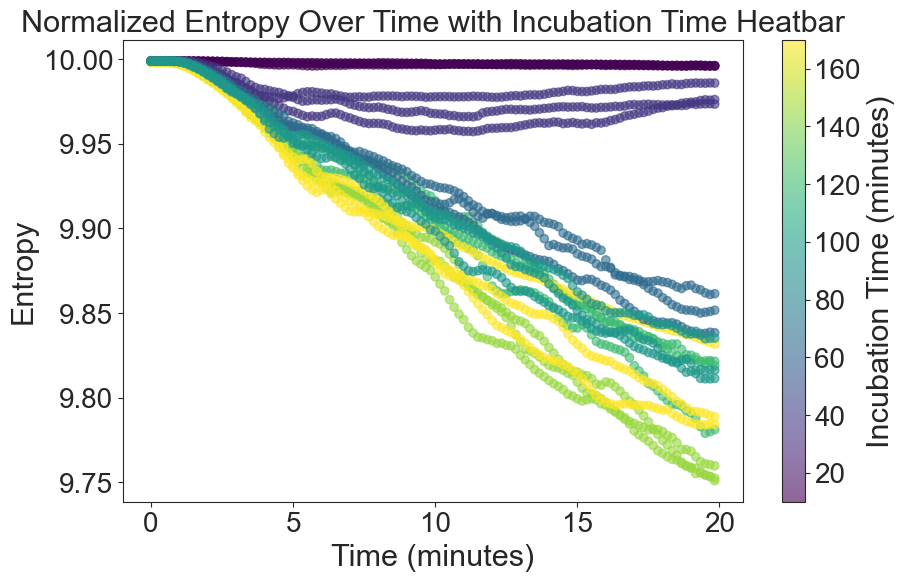

In [61]:

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(df['Frame Number']*10/60, df['Entropy'], c=df['Incubation Time'], cmap='viridis', alpha=0.6)
plt.colorbar(sc, label='Incubation Time (minutes)')
plt.xlabel('Time (minutes)')
plt.ylabel('Entropy')
plt.title('Normalized Entropy Over Time with Incubation Time Heatbar')
plt.show()

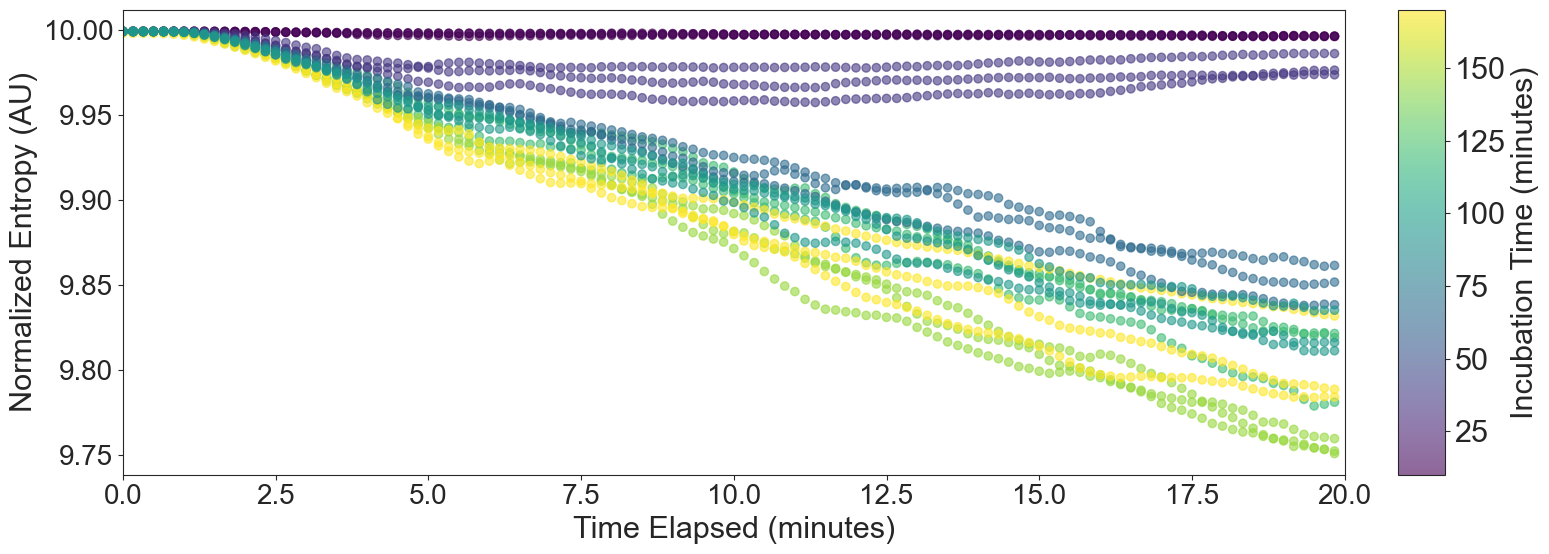

In [64]:
# Set the style of seaborn for prettier plots
sns.set_style('ticks')

# Set larger font sizes
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=22)    # legend fontsize
# Plotting



plt.figure(figsize=(16, 6))
sc = plt.scatter(df['Frame Number']*10/60, df['Entropy'], c=df['Incubation Time'], cmap='viridis', alpha=0.6)
cbar = plt.colorbar(sc, label='Incubation Time (minutes)', aspect = 10, fraction=0.05, pad=0.04)
cbar.ax.tick_params(labelsize=22)  # Adjust colorbar tick label size if needed
plt.xlabel('Time Elapsed (minutes)')
plt.ylabel('Normalized Entropy (AU)')

plt.xlim(left=0)
plt.xlim(right=20)

# Customizing ticks to remove duplicate zero
#plt.xticks(ticks=[0, 5, 10, 15, 20], labels=['', '5', '10', '15', '20'])  # Assuming these are the x-ticks you want
#plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0', '0.2', '0.4', '0.6', '0.8', '1.0'])  # Setting y-ticks


plt.tight_layout()
plt.show()

In [54]:
start = '/Volumes/SL_2023/0104/correlation_10_min_no_6.1_1/Pos1/img_000000000_Cy5_000.tif'
end = '/Volumes/SL_2023/0104/correlation_10_min_no_6.1_1/Pos1/img_000000119_Cy5_000.tif'


start_image = Image.open(start)
end_image = Image.open(end)

start_image_np = np.array(start_image)
end_image_np = np.array(end_image)



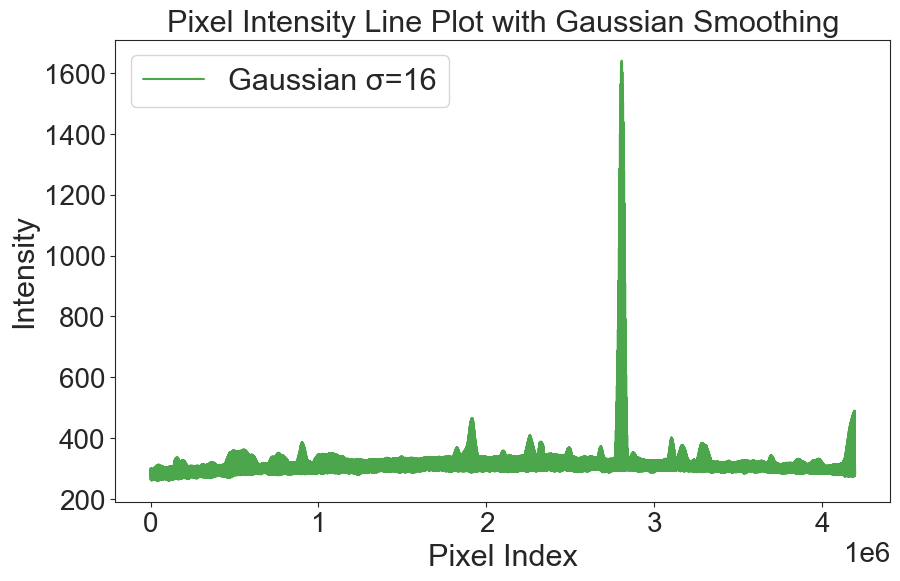

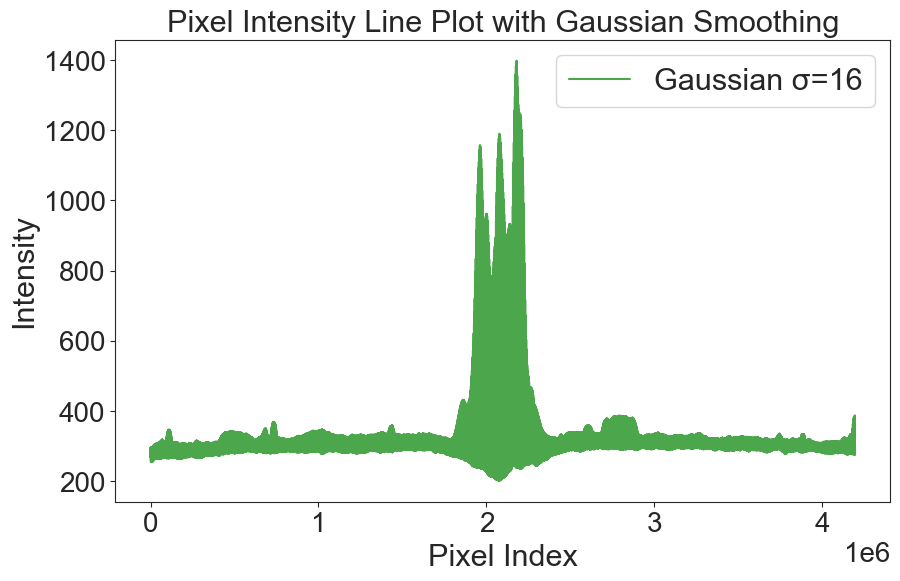

In [58]:
# Function to apply Gaussian filter to an image and plot its pixel intensity
def apply_gaussian_filter_and_plot(image_np, size):
    # Apply Gaussian filter for smoothing
    image_smoothed = uniform_filter(image_np, size=size)
    
    # Flatten the arrays to get all pixel intensities
    pixels_smoothed = image_smoothed.flatten()
    
    # Plot the pixel intensity as a line plot with smoothing
    plt.figure(figsize=(10, 6))
    plt.plot(pixels_smoothed, label=f'Gaussian σ={size}', color='green', alpha=0.7)
    plt.title('Pixel Intensity Line Plot with Gaussian Smoothing')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.show()

# Apply the Gaussian filter with a sigma of 1 for demonstration
apply_gaussian_filter_and_plot(start_image, size=16)
apply_gaussian_filter_and_plot(end_image, size=16)



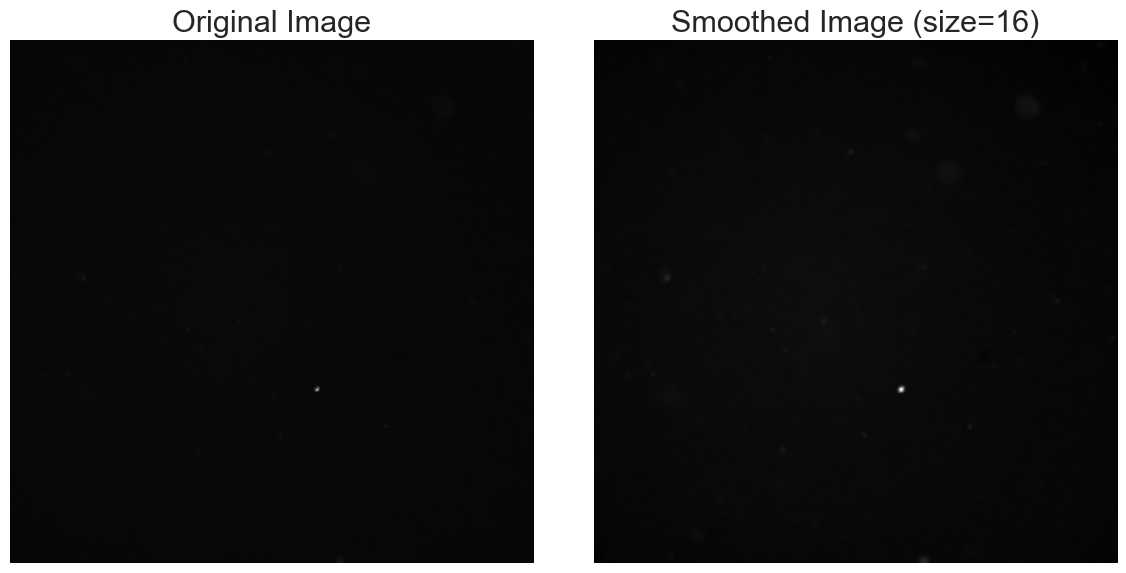

In [57]:
# Apply Gaussian filter with a sigma of 1
size = 16
smoothed_image = uniform_filter(start_image, size=size)

# Plot the original and smoothed images side by side for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(start_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Smoothed image
axes[1].imshow(smoothed_image, cmap='gray')
axes[1].set_title(f'Smoothed Image (size={size})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

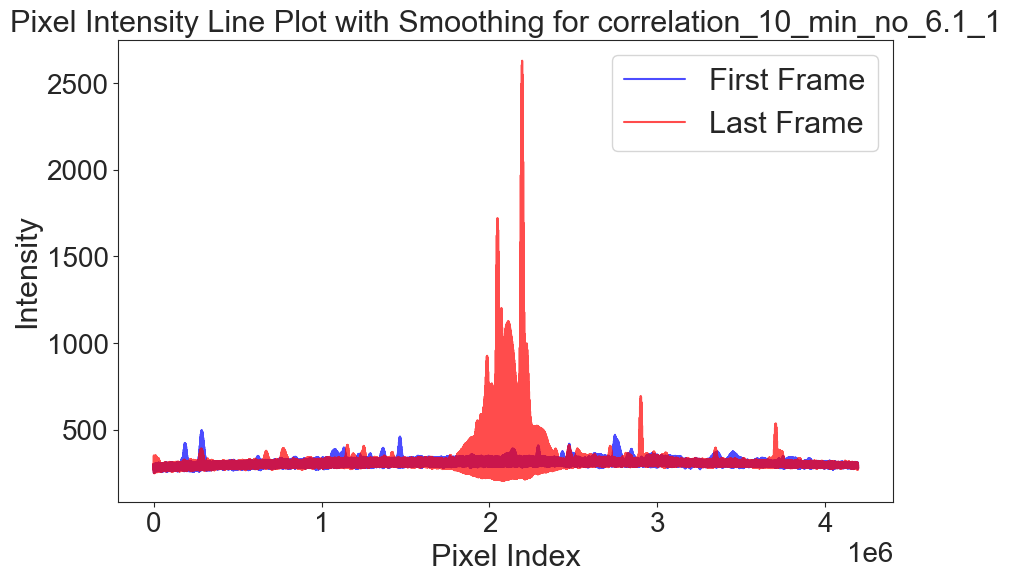

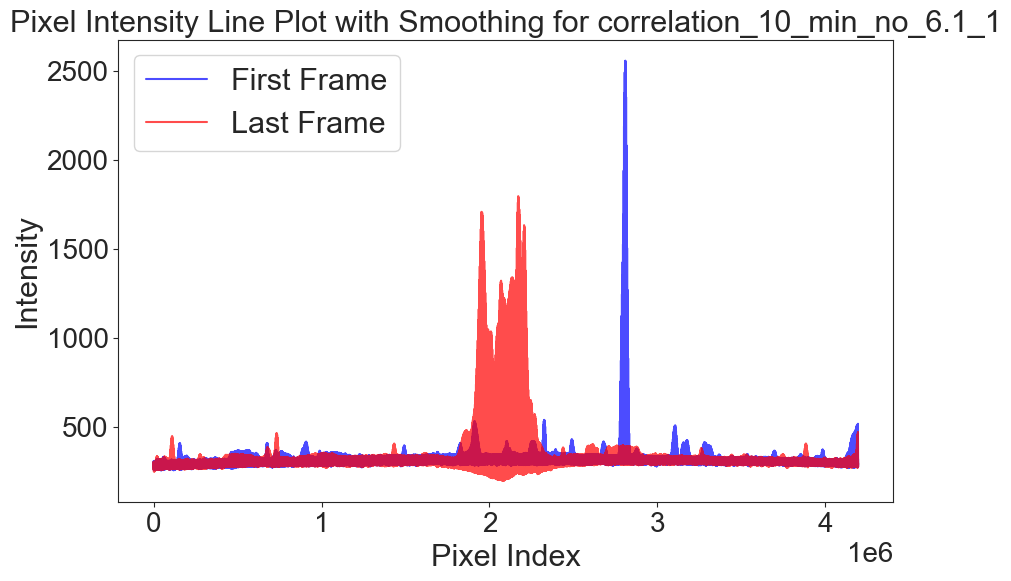

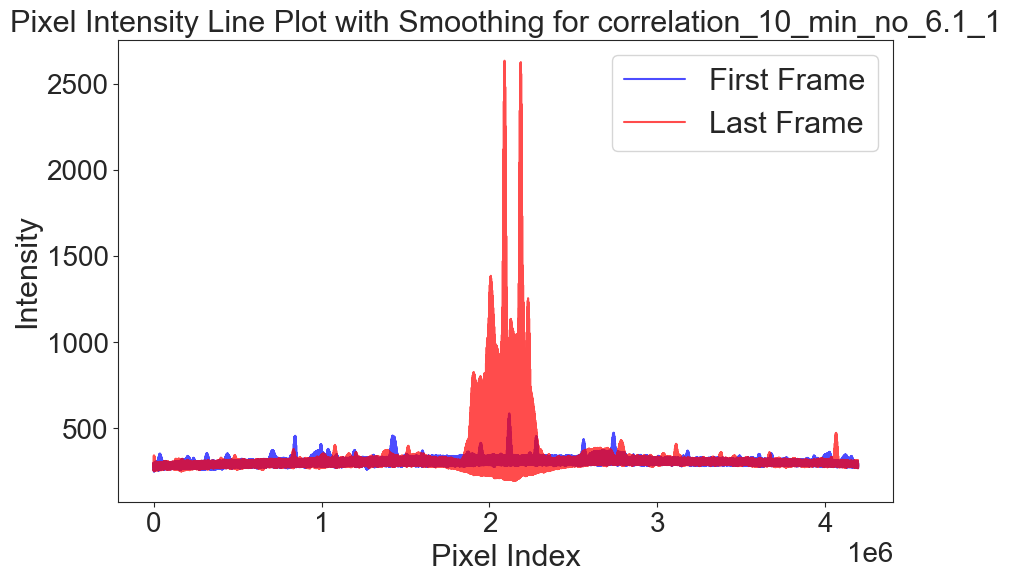

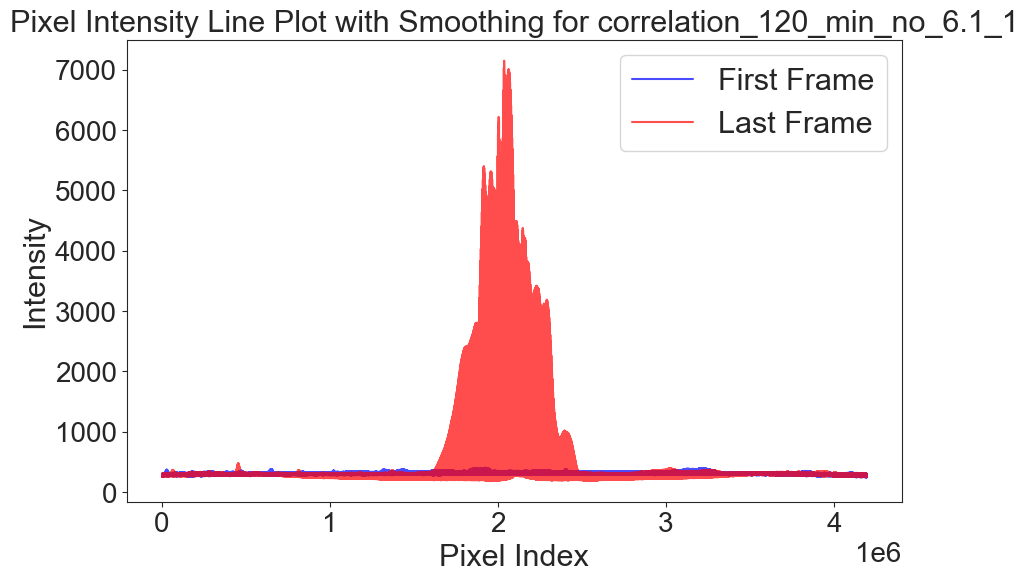

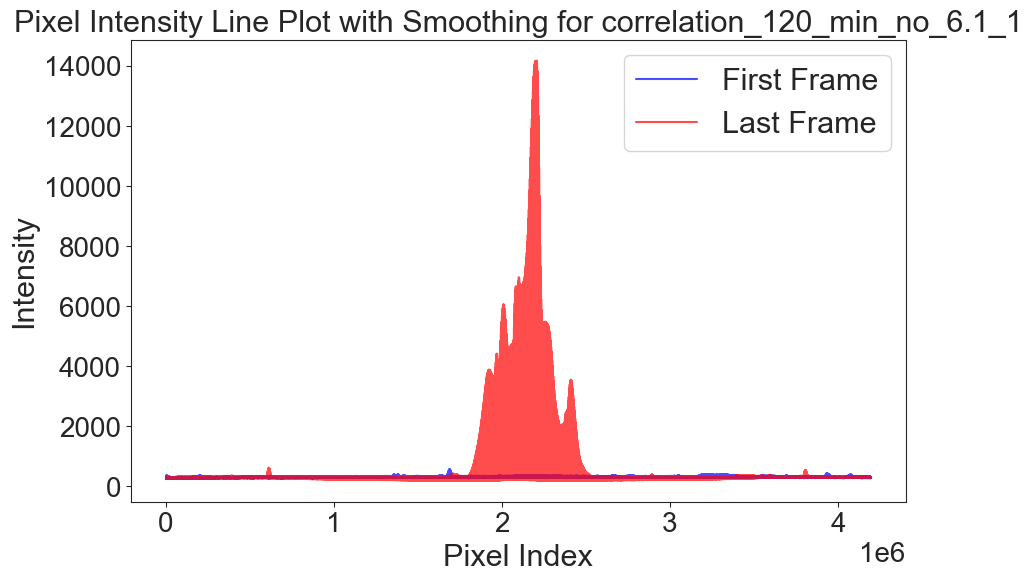

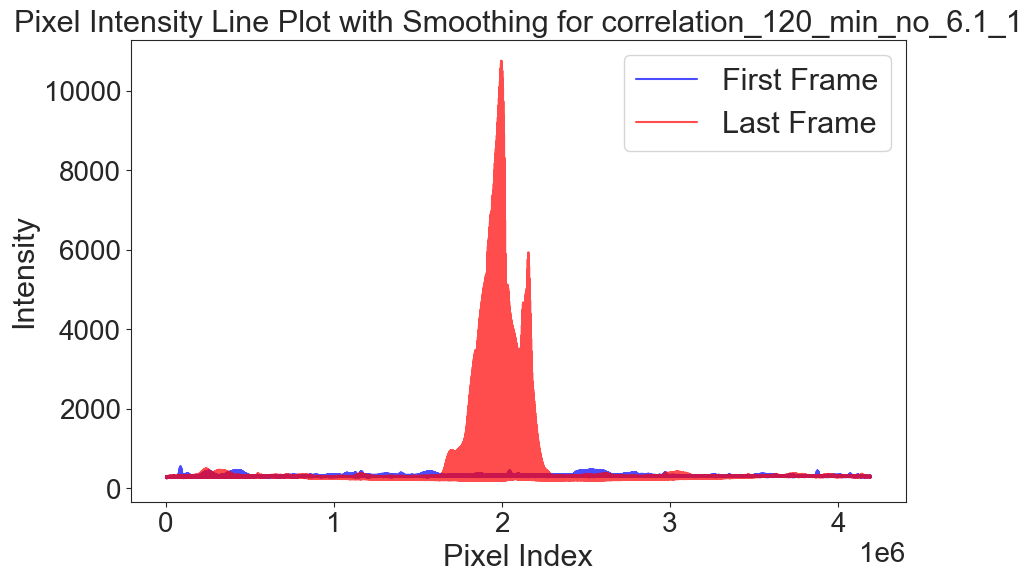

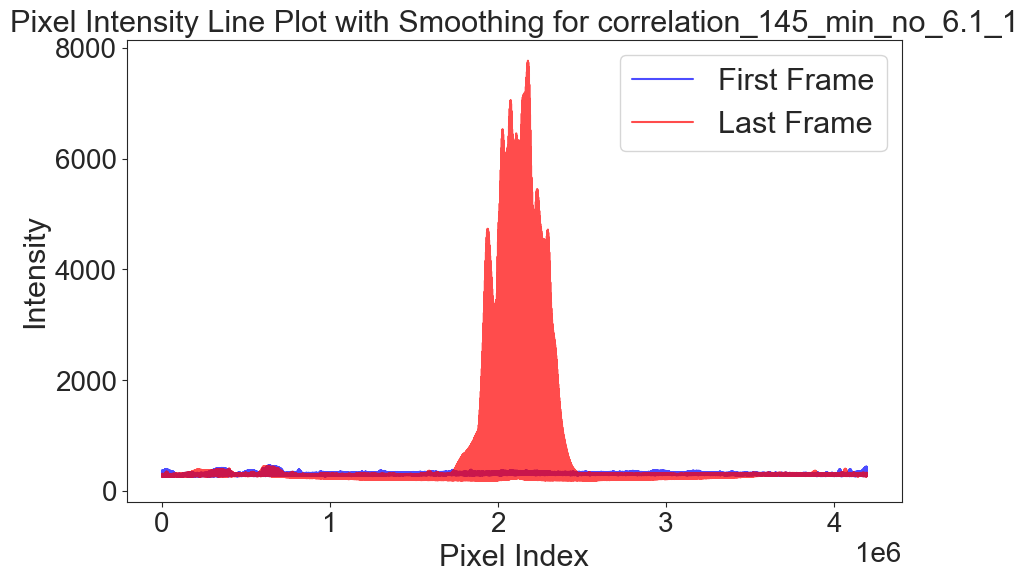

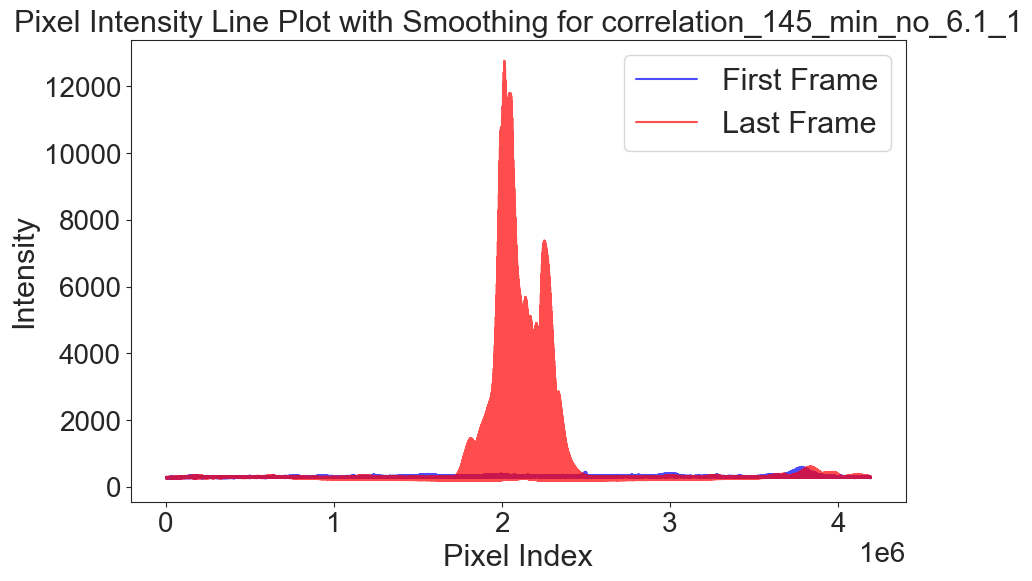

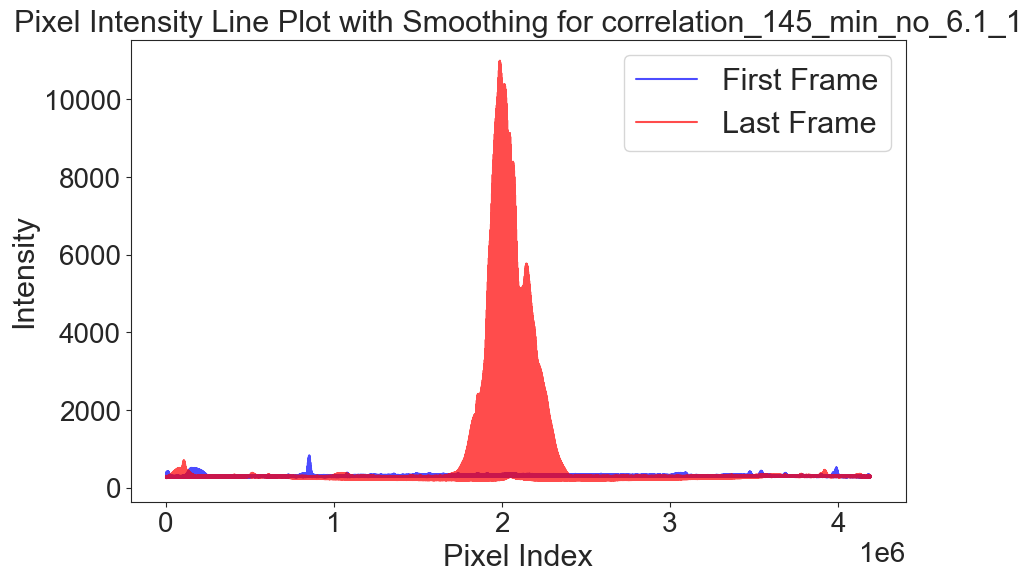

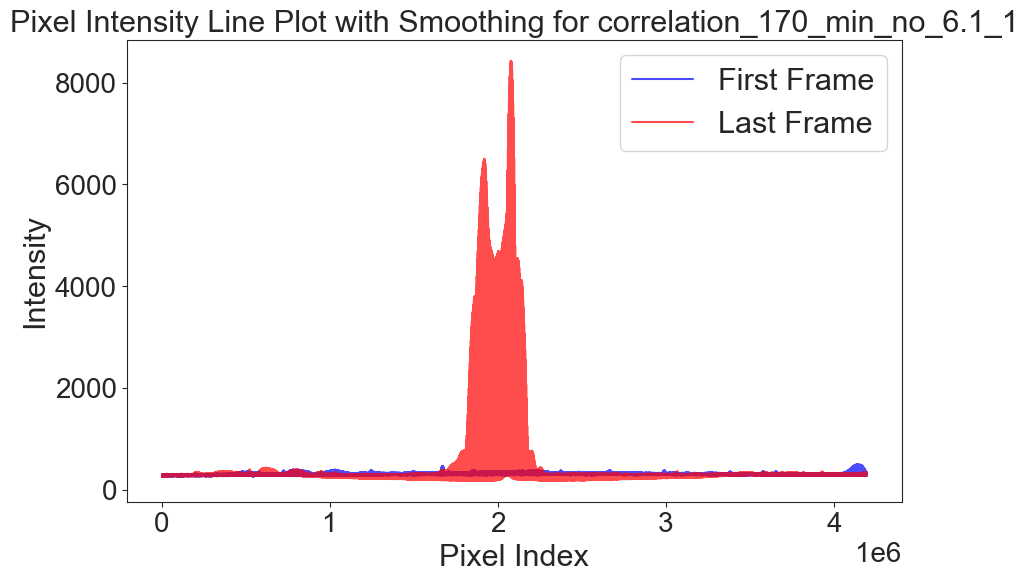

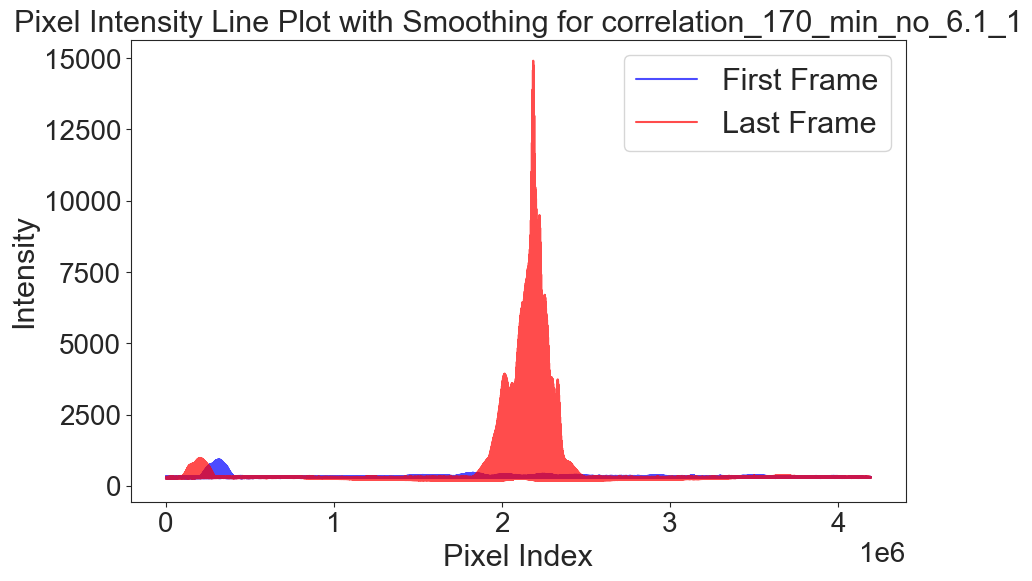

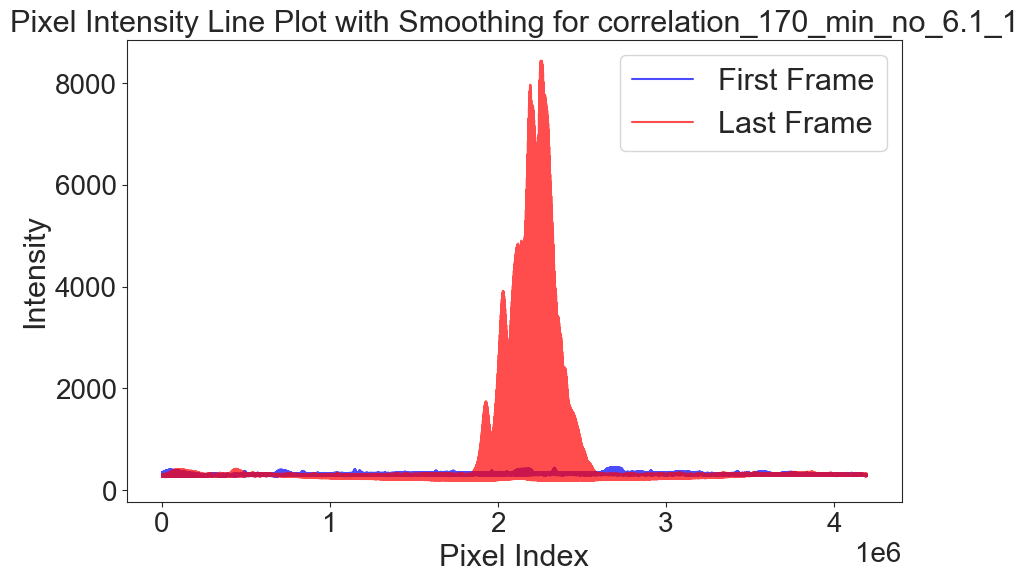

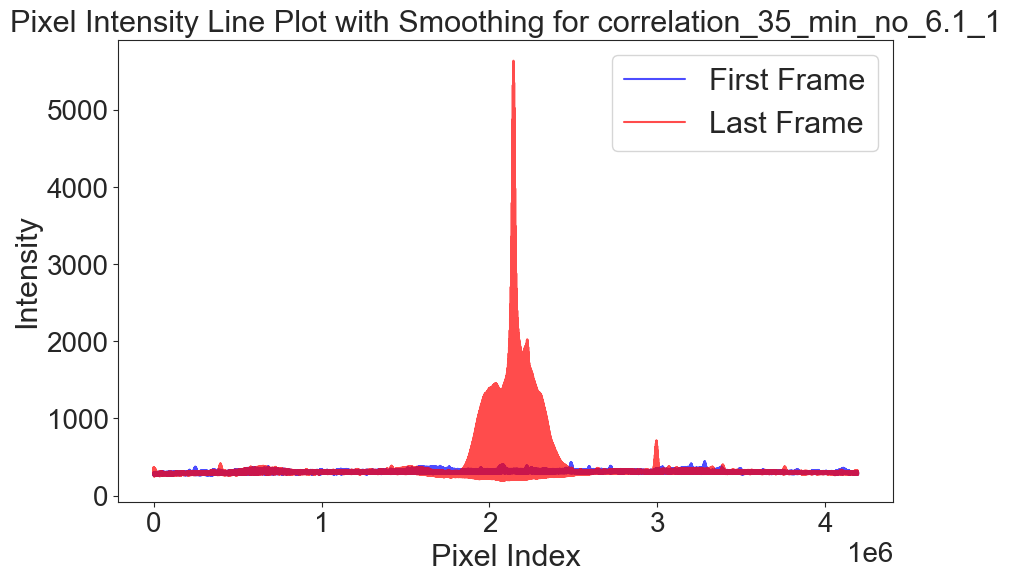

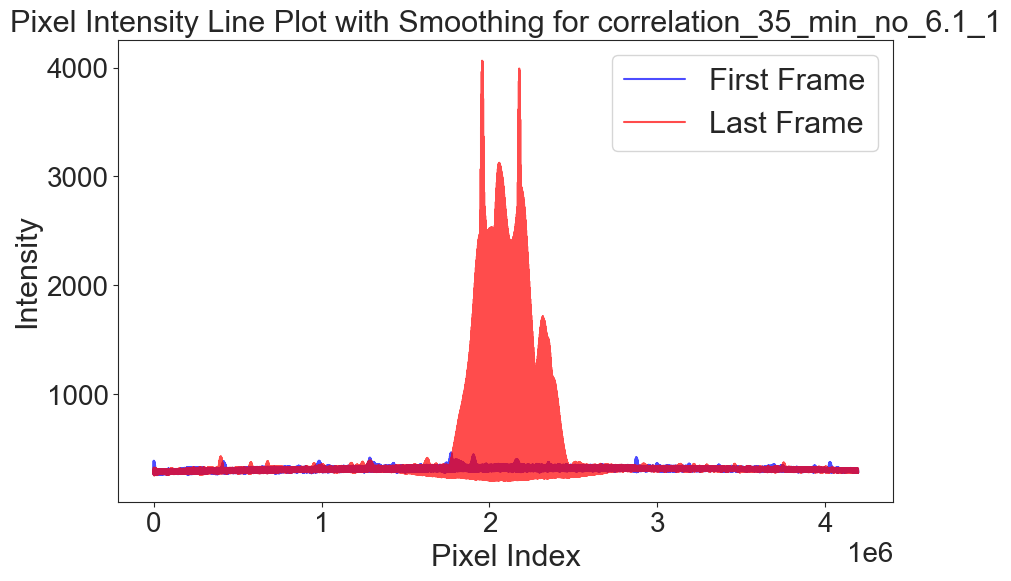

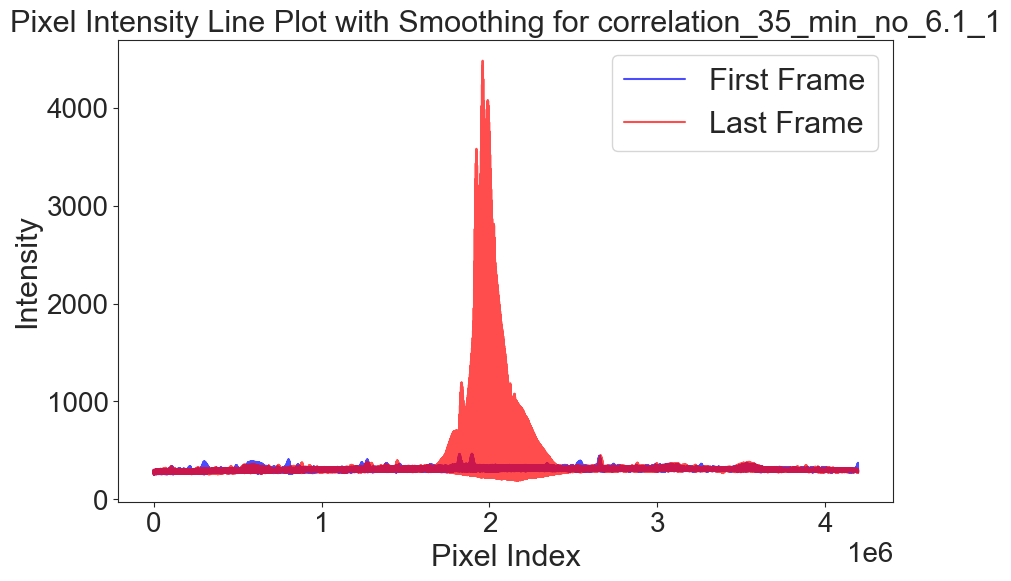

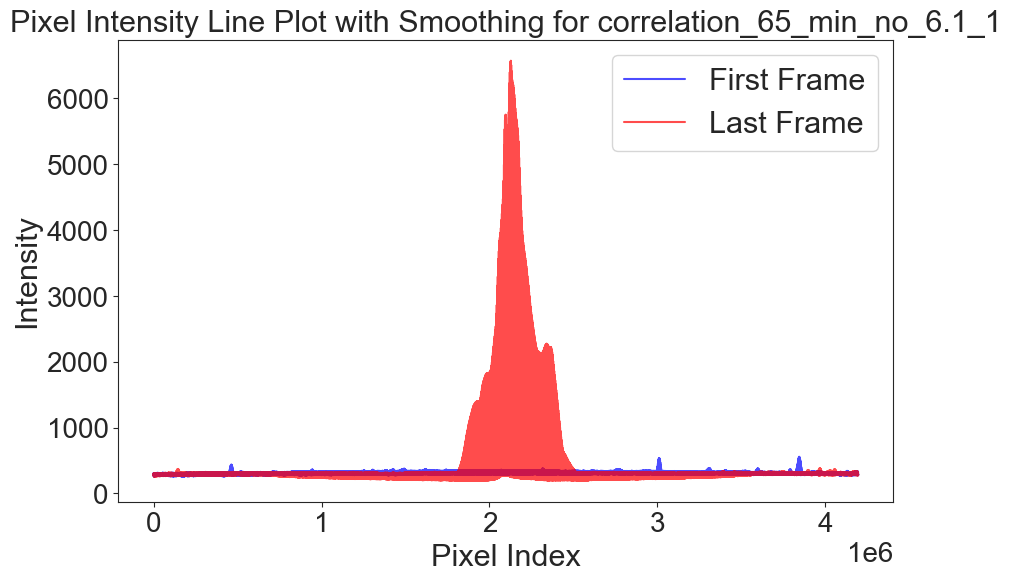

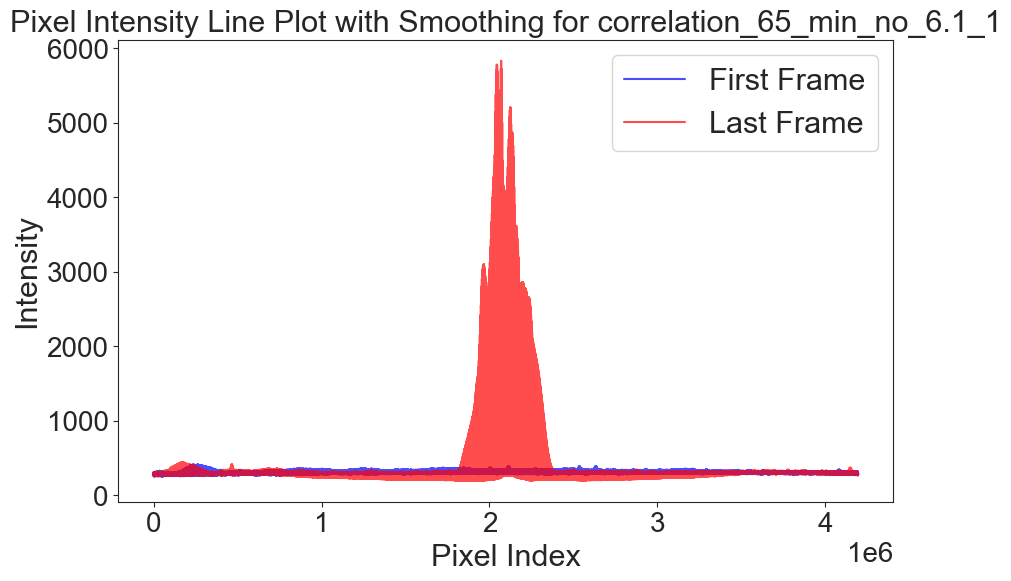

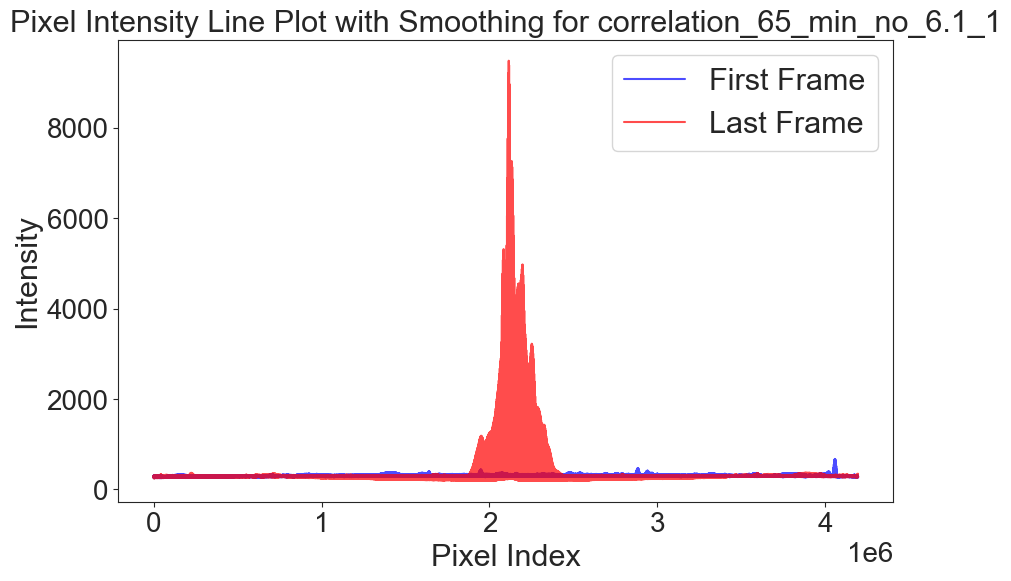

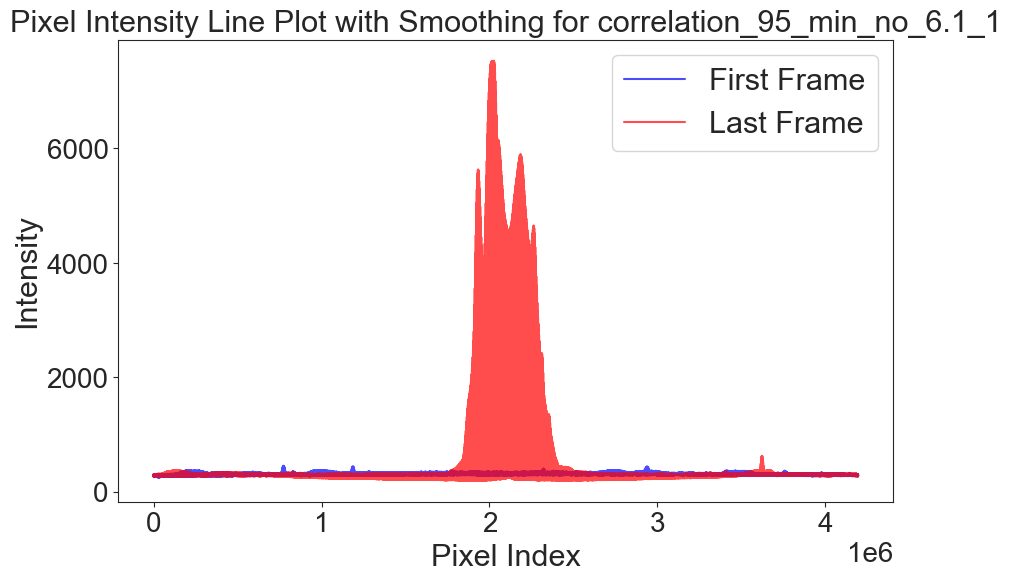

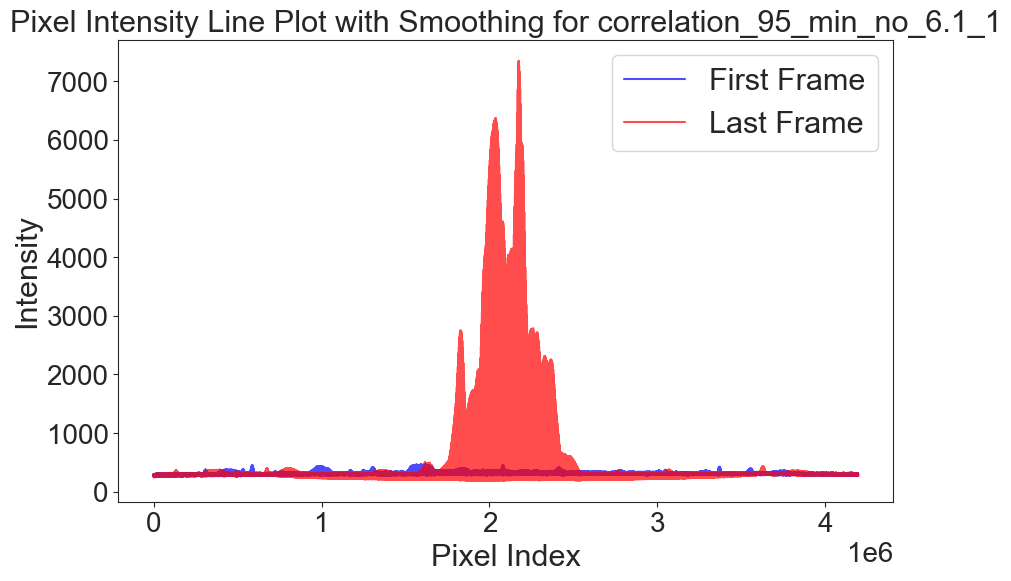

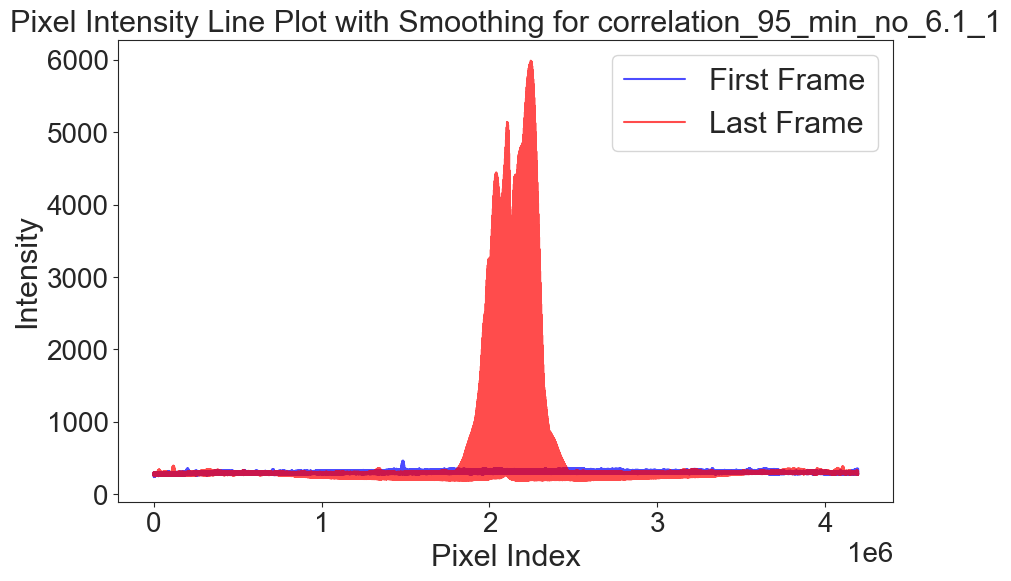

In [53]:
def plot_pixel_intensity_line_with_smoothing(tiff_folder_path, experiment_name):
    tiff_files = [f for f in os.listdir(tiff_folder_path) if f.endswith('_Cy5_000.tif')]
    # Load the first and last image
    first_image_path = os.path.join(tiff_folder_path, tiff_files[0])
    last_image_path = os.path.join(tiff_folder_path, tiff_files[-1])
    
    first_image = Image.open(first_image_path)
    last_image = Image.open(last_image_path)
    
    first_image_np = np.array(first_image)
    last_image_np = np.array(last_image)
    
    # Apply a Gaussian filter for smoothing
    size = 8  # This sigma controls the amount of smoothing
    first_image_smoothed = uniform_filter(first_image_np, size=size)
    last_image_smoothed = uniform_filter(last_image_np, size=size)
    
    # Flatten the arrays to get all pixel intensities
    first_frame_pixels_smoothed = first_image_smoothed.flatten()
    last_frame_pixels_smoothed = last_image_smoothed.flatten()
    
    # Plot the pixel intensity as a line plot with smoothing and alpha
    plt.figure(figsize=(10, 6))
    plt.plot(first_frame_pixels_smoothed, label='First Frame', color='blue', alpha=0.7)
    plt.plot(last_frame_pixels_smoothed, label='Last Frame', color='red', alpha=0.7)
    plt.title(f'Pixel Intensity Line Plot with Smoothing for {experiment_name}')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.show()

base_folder = '/Volumes/SL_2023/0104'
experiment_folders = [f for f in os.listdir(base_folder) if 'correlation' in f]

for exp_folder in experiment_folders:
    exp_folder_path = os.path.join(base_folder, exp_folder)
    pos_folders = [os.path.join(exp_folder_path, d) for d in os.listdir(exp_folder_path) if d.startswith('Pos')]
    
    for pos_folder in pos_folders:
        plot_pixel_intensity_line_with_smoothing(pos_folder, exp_folder)



In [5]:
video_files = [f for f in os.listdir(folder_path) if f.endswith('.avi')]

all_entropies = []
video_data = {}

for video_file in video_files:
    video_path = os.path.join(folder_path, video_file)
    entropy_over_time, frame_count = process_video(video_path)
    video_data[video_file] = (entropy_over_time, frame_count)
    all_entropies.extend(entropy_over_time)

# Global Normalization
min_entropy = min(all_entropies)
max_entropy = max(all_entropies)

plt.figure(figsize=(10, 6))

for video_file, (entropy_over_time, frame_count) in video_data.items():
    normalized_entropy = [(e - min_entropy) / (max_entropy - min_entropy) for e in entropy_over_time]
    plt.plot(range(frame_count), entropy_over_time, label=video_file)

plt.xlabel('Frame Number')
plt.ylabel('Normalized Entropy')
plt.title('Global Normalized Entropy Over Time in Multiple Videos')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy'

OpenCV: Couldn't read video stream from file "/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/170_3.avi"


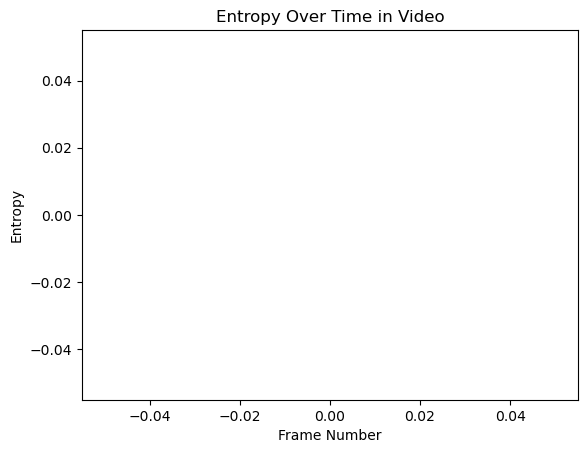

Theoretical Maximum Entropy: 8.643856189774725


In [62]:
def calculate_grid_entropy(image, grid_size=(20, 20)):  # Adjusted grid size to 20x20 for 400 cells
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)
    entropy_values /= entropy_values.sum()

    # Sanity check for normalization
    print(f"Sum of normalized values (should be close to 1): {entropy_values.sum()}")

    entropy = -np.sum(entropy_values * np.log2(entropy_values))# + np.finfo(float).eps))
    return entropy

# Replace 'path_to_your_video.mp4' with your video file path
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/170_3.avi'
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()

# Compare with theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    start_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

cap.release()

In [ ]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    video_frames.append(gray_frame)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

In [ ]:
import cv2

# Initialize the list to hold the frames
video_frames = []

# Load your video
video_path = '/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/145_2.avi'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Append the frame to the list
    video_frames.append(gray_frame)

cap.release()

# Now 'video_frames' contains all the frames of the video in grayscale


In [ ]:
video_frames

[array([[ 71,  71,  95, ...,  70,  77,  67],
        [ 67,  79,  86, ...,  82,  86,  71],
        [ 78,  84,  86, ...,  82,  91,  80],
        ...,
        [101,  97,  96, ...,  94,  92,  90],
        [ 97, 102,  91, ...,  93,  91,  90],
        [ 82,  94,  78, ...,  81,  82,  83]], dtype=uint8),
 array([[ 61,  74,  74, ...,  78,  70,  75],
        [ 67,  91,  89, ...,  84,  67,  59],
        [ 73,  93,  90, ...,  82,  83,  79],
        ...,
        [ 83,  92,  99, ...,  96,  98,  99],
        [ 78,  90,  99, ...,  94,  90,  87],
        [ 76,  90, 101, ...,  92,  87,  82]], dtype=uint8),
 array([[ 75,  69,  73, ...,  81,  85,  85],
        [ 88,  80,  77, ...,  87,  83,  83],
        [ 79,  81,  84, ...,  79,  74,  75],
        ...,
        [ 97, 114, 102, ...,  91,  87,  88],
        [ 91, 106,  93, ...,  94,  85,  78],
        [ 83,  94,  83, ...,  90,  84,  70]], dtype=uint8),
 array([[ 75,  86,  79, ...,  75,  75,  91],
        [ 83,  89,  93, ...,  86,  80,  84],
        [ 82,  8

In [49]:
def calculate_grid_entropy_plot_grid(image, grid_size=(32, 32), plot_distribution=False):
    height, width = image.shape[:2]
    cell_height, cell_width = height // grid_size[0], width // grid_size[1]
    entropy_values = []

    for i in range(0, height, cell_height):
        for j in range(0, width, cell_width):
            cell = image[i:i+cell_height, j:j+cell_width]
            mean_intensity = np.mean(cell)
            entropy_values.append(mean_intensity)

    entropy_values = np.array(entropy_values)

    if plot_distribution:
        plt.figure(figsize=(10, 4))
        plt.hist(entropy_values, bins=50, color='blue', alpha=0.7)
        plt.title('Distribution of Normalized Mean Intensities')
        plt.xlabel('Normalized Mean Intensity')
        plt.ylabel('Frequency')
        plt.show()

    entropy_values /= entropy_values.sum()
    entropy = -np.sum(entropy_values * np.log2(entropy_values + np.finfo(float).eps))
    return entropy




In [ ]:
entropy = calculate_grid_entropy(test_image)
print(f"Calculated Entropy: {entropy}")

Calculated Entropy: 8.6438561897746


In [6]:
# Calculate entropy and plot the distribution of mean intensities
entropy = calculate_grid_entropy(test_image, plot_distribution=True)
print(f"Calculated Entropy: {entropy}")


NameError: name 'test_image' is not defined

In [8]:
test_image_single_pixel = np.zeros((200, 200), dtype=np.uint8)
test_image_single_pixel[0, 0] = 1


calculate_grid_entropy(test_image_single_pixel)

Sum of normalized values (should be close to 1): 1.0


-3.203426503814917e-16

In [9]:
import pims


In [10]:
frames = pims.ImageSequence('/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_2/stokes/1120/mid_pH_test_125min_1/Pos2/*.tif')


OSError: No files were found matching that path.

In [11]:
# only want the bf frame
bf_frames = frames[::3]
bf_frames[1]
len(bf_frames)

NameError: name 'frames' is not defined

In [12]:
# only want the bf frame
cy5_frames = frames[::1]
cy5_frames[502]


NameError: name 'frames' is not defined

In [13]:


entropy_over_time = []

for frame in cy5_frames:
    # Convert to grayscale if the image is in color
    if len(frame.shape) == 3:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        gray_frame = frame

    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)

# Plotting the entropy over time
plt.plot(range(len(frames)), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in TIFF Image Sequence')
plt.show()

# Theoretical maximum entropy
max_theoretical_entropy = np.log2(32*32)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")


NameError: name 'cy5_frames' is not defined

OpenCV: Couldn't read video stream from file "/home/shichenliu/Dropbox/Academics/PhD_phase/Thomson_Lab/local_to_global_pre-print/data/figure_1/entropy/145_2.avi"


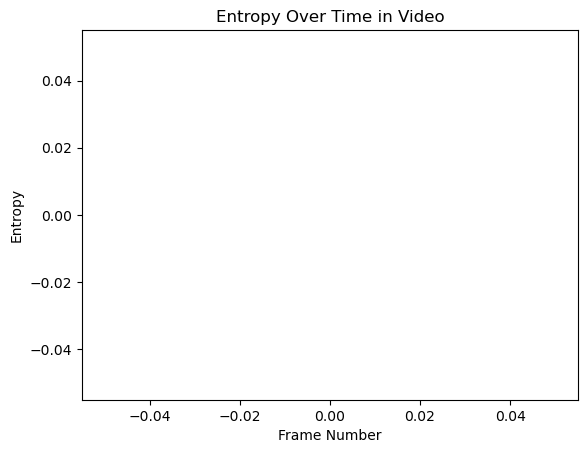

Theoretical Maximum Entropy: 8.643856189774725


In [14]:
cap = cv2.VideoCapture(video_path)

entropy_over_time = []
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale if your video is in color
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    entropy = calculate_grid_entropy(gray_frame)
    entropy_over_time.append(entropy)
    frame_count += 1

cap.release()

# Plotting the entropy over time
plt.plot(range(frame_count), entropy_over_time)
plt.xlabel('Frame Number')
plt.ylabel('Entropy')
plt.title('Entropy Over Time in Video')
plt.show()

# Compare with theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")

In [15]:
len(cy5_frames[1])

NameError: name 'cy5_frames' is not defined

In [16]:
cy5_frames[100]

NameError: name 'cy5_frames' is not defined

In [17]:
entropy = calculate_grid_entropy(cy5_frames[1])
entropy

NameError: name 'cy5_frames' is not defined

In [18]:
entropy = calculate_grid_entropy(cy5_frames[517])
entropy

NameError: name 'cy5_frames' is not defined

In [19]:
cy5_frames[517]

NameError: name 'cy5_frames' is not defined

In [20]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [22]:
from PIL import Image


In [23]:
start = '/Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos2/img_000000000_Cy5_000.tif'
end = '/Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos2/img_000000119_Cy5_000.tif'


start_image = Image.open(start)
end_image = Image.open(end)

start_image_np = np.array(start_image)
end_image_np = np.array(end_image)



In [24]:
end = '/Volumes/SL_2023/0104/correlation_120_min_no_6.1_1/Pos2/img_000000119_Cy5_000.tif'

In [53]:
start_image = Image.open(start)
end_image = Image.open(end)

In [54]:
start_image_np = np.array(start_image)
end_image_np = np.array(end_image)


In [55]:
end_flattened_data = end_image_np.flatten()
start_flattened_data = start_image_np.flatten()


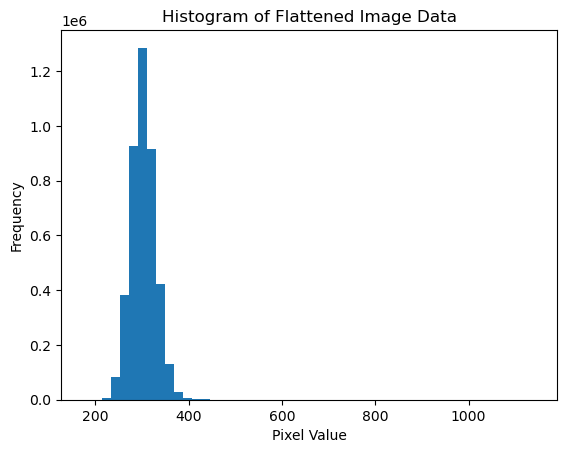

1142

In [56]:
plt.hist(start_flattened_data, bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of Flattened Image Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
max(start_flattened_data)

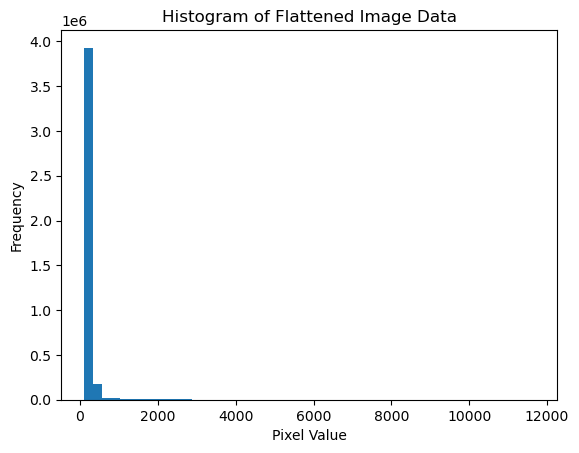

11685

In [57]:
plt.hist(end_flattened_data, bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of Flattened Image Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
max(end_flattened_data)

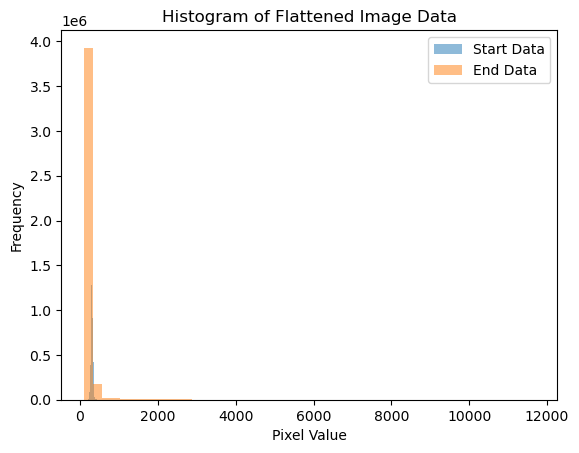

In [58]:
# Plotting both histograms on the same plot for visual comparison
plt.hist(start_flattened_data, bins=50, alpha=0.5, label='Start Data')  # Adjust the number of bins as needed
plt.hist(flattened_data, bins=50, alpha=0.5, label='End Data')  # Adjust the number of bins as needed
plt.title('Histogram of Flattened Image Data')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()



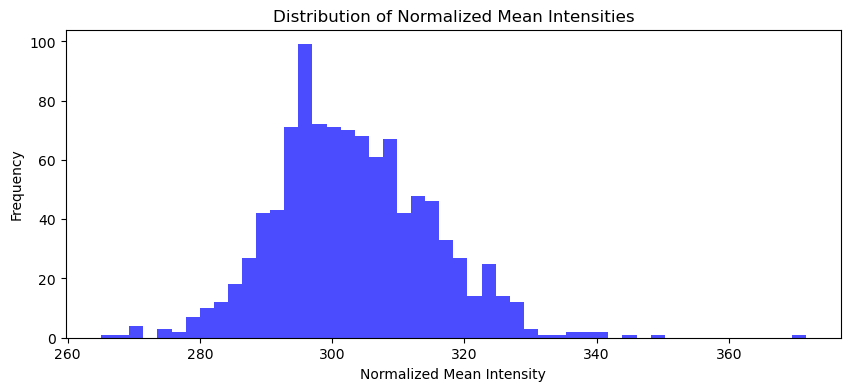

Calculated Entropy: 9.998898295746507


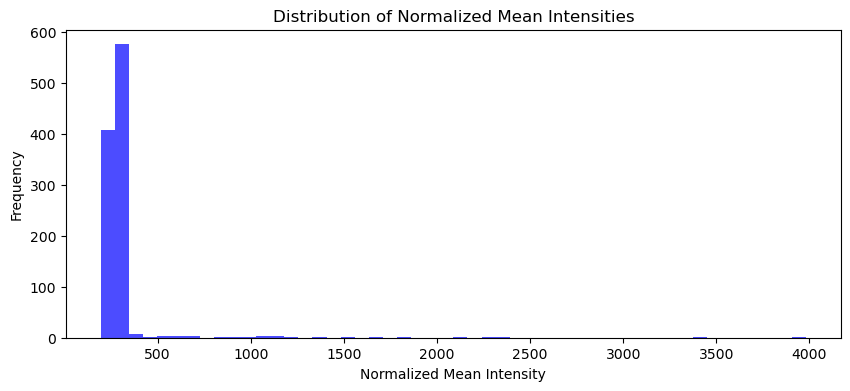

Calculated Entropy: 9.822190090298104
Theoretical Maximum Entropy: 8.643856189774725


In [59]:
# Calculate entropy and plot the distribution of mean intensities
entropy = calculate_grid_entropy_plot_grid(start_image_np, plot_distribution=True)
print(f"Calculated Entropy: {entropy}")
entropy = calculate_grid_entropy_plot_grid(end_image_np, plot_distribution=True)
print(f"Calculated Entropy: {entropy}")
# Theoretical maximum entropy
max_theoretical_entropy = np.log2(400)  # For 400 cells
print(f"Theoretical Maximum Entropy: {max_theoretical_entropy}")

In [35]:
entropy = calculate_grid_entropy(start_image_np)
entropy

Sum of normalized values (should be close to 1): 1.0


9.998898295746507

In [36]:
entropy = calculate_grid_entropy(end_image_np)
entropy

Sum of normalized values (should be close to 1): 1.0


9.822190090298104